<h1 align="center"><b>Homework Assignment 3 (100 points total)</b></h1>
<h3 align="center"><b>Assigned at the start of Module 9</b></h3>
<h3 align="center"><b>Due at the end of Module 12</b></h3><br>


# Q1: Supervised Learning Regression

## Build a supervised learning linear regression model (scikit-learn permitted) (30 points total)

In this question, you will analyze a housing dataset and investigate the impact of multicollinearity on a Linear Regression model. You will then apply Ridge and Lasso Regression to mitigate these effects and compare their performance.

---

### **1. Data Acquisition & Preprocessing (5 points)**
- **Dataset** Use the California Housing Dataset (available via `sklearn.datasets`).
- **Exploratory Data Analysis (EDA):**
    - Identify and describe the feature distributions.
    - Check for multicollinearity using a correlation heatmap and Variance Inflation Factor (VIF).
    - Select a subset of features that introduce multicollinearity.
- **Preprocessing**:
    - Standardize the dataset to ensure consistent scaling.
    - Split the data into training (80%) and testing (20%) sets.

Descriptive Stats:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Feature Distributions:


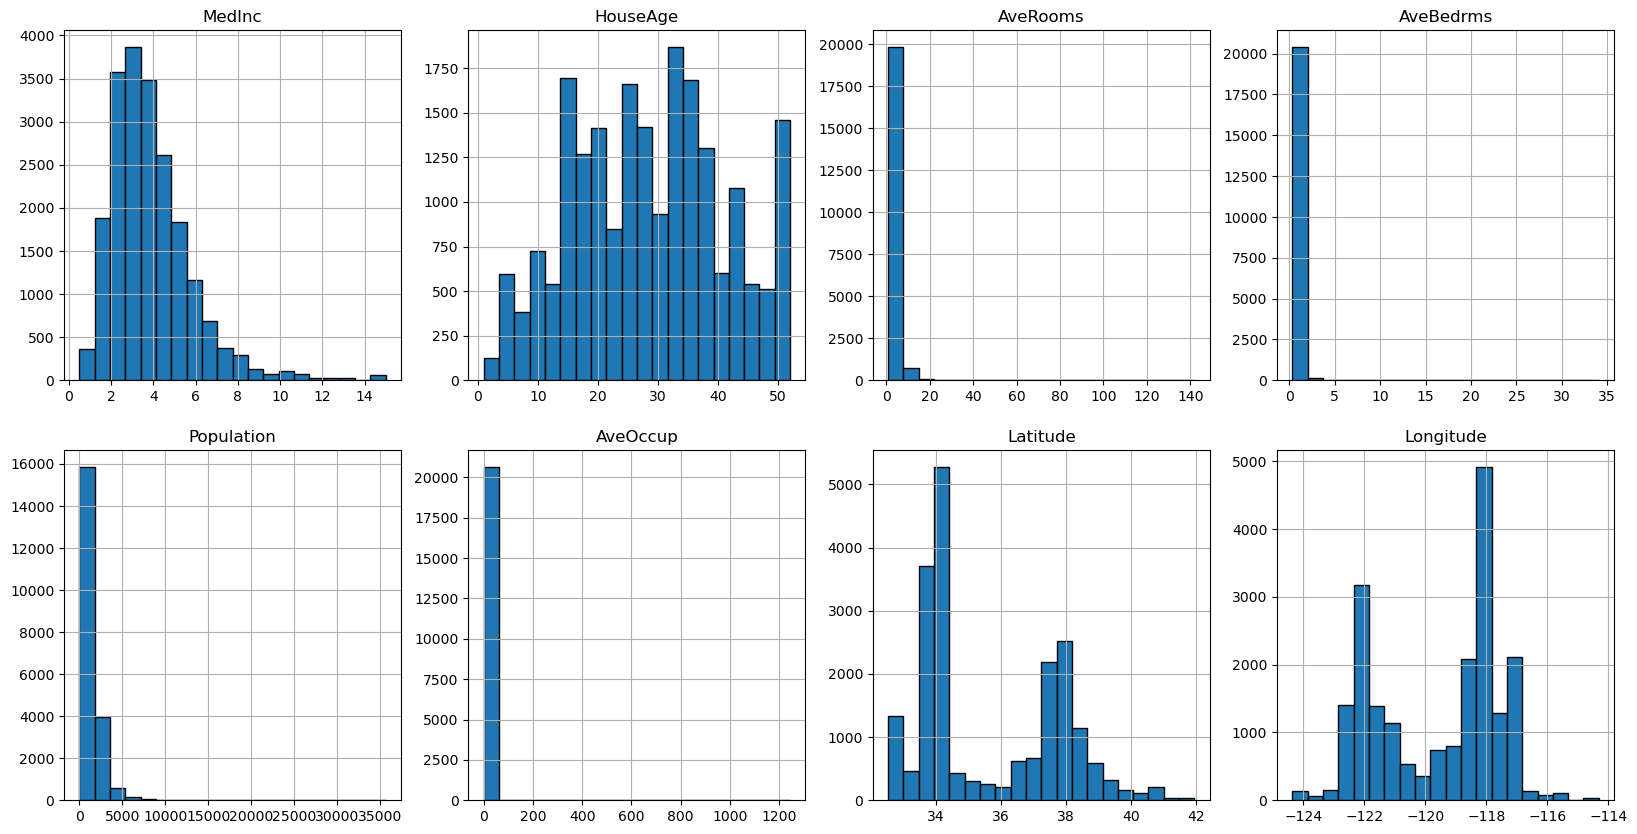

Missing Values:


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Heatmap:


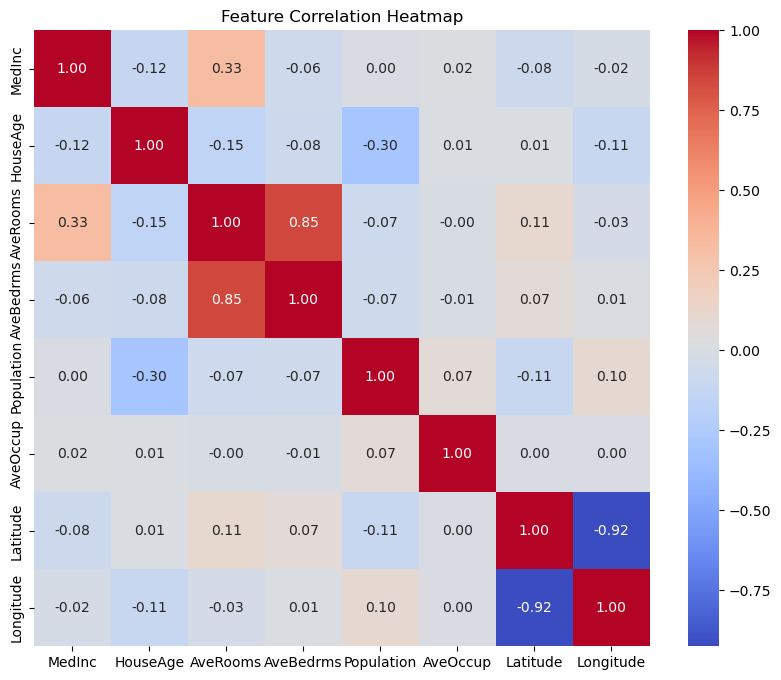

VIF:


,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [29]:
# Calfiornia Housing Dataset 
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data['data'], columns=housing_data['feature_names'])
housing_df[housing_data['target_names'][0]] = housing_data['target']

# --- Exploratory Data Analysis ---
# Descriptive statistics and feature distributions 
print("Descriptive Stats:")
display(housing_df.describe())

print("Feature Distributions:")
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(housing_df.columns):
    if i < len(axes): 
        housing_df[column].hist(ax=axes[i], bins=20, edgecolor='black')
        axes[i].set_title(f'{column}')
plt.show()

print("Missing Values:")
display(housing_df.isna().sum())

# Correlation Heatmap 
print("Heatmap:")
target = housing_df['MedHouseVal']
features = housing_df.drop(columns='MedHouseVal')
corr_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# VIF
print("VIF:")
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
display(vif_data)

# --- Preprocessing ---
# Standardize data 
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Split into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


From the above, we can see that the data in the California Housing dataset is all numeric. There are 8 independent variables and 1 dependent target varible. The 8 independent variables include median income, median house age, average number of rooms per house, average number of bedrooms per house, population, average number of household members, latitude, and longitude. None of the data is missing. Also, based on the feature distribution histograms, none of the features (independent variabels) are normally distributed. Median income, avg rooms, avg bedrooms, population, and avg occup are all skewed right. Latitude and Longitude are bimodal. 

From the correlation heatmap, we can see that latitude and longitude are highly correlated, indicating multicollinearity. Also, AveRooms and AveBedrms are highly correlated, also indicating multicollinearity. Here, I am assuming that a correltion > |0.08| indicates multicollinearity. 

We can also check for multicollinearity using the VIF. Here, VIF = 1 indicates no multicollinearity, VIF > 5 indicates some multicollinearity, and VIF > 10 indicates very high multicollinearity. We should conider removing features with VIF > 10. MedInc, AveRooms, AveBedrms, Latitude, and Longitude all have very large VIF values, and we should consider removing them from our dataset.  

This question asks "Select a subset of features that introduce multicollinearity." The dataset as it is does introduce multicollinearity, so I will continue this problem with the full set. If we wanted a subset of features where all features introduce multicollinearity, we should select MedInc, Latitude, Longitude, AveRooms, and AveBedrms. If we wanted to remove multicollinearity, we should exclude these features, especially latitude and longitude. 

---
### 2. **Regression Model Development (10 points)**
- **Train a Linear Regression Model:**
    - Fit a standard Linear Regression model to the data.
    - Report the coefficients and explain their significance.
    - Evaluate the model using MSE, RMSE, and $R^2$.
- **Detect Multicollinearity Issues:**
    - Identify unstable coefficients or unusually large magnitudes in the model.
    - Explain how multicollinearity affects interpretation.

In [36]:
# --- Train Linear Regression Model --- 
# Fit standard LR model to the data 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)

# Report coefficients 
print('Model Coefficients and Intercept:')
coefficients = pd.DataFrame({
    'Feature': features_scaled.columns,
    'Coefficient': model.coef_
})
display(coefficients)
intercept = print(f"Intercept: {model.intercept_:.4f}\n")

# Evaluate model with MSE, RMSE, and R2
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

# --- Detect Multicollinearity Issues --- 
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
unstable_coeffs = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
# display(unstable_coeffs)

# display(vif_data)
x = vif_data.merge(unstable_coeffs, on='Feature')
x.sort_values(by='Abs_Coefficient', ascending=False)


Model Coefficients and Intercept:


,Feature,Coefficient
0,MedInc,0.852382
1,HouseAge,0.122382
2,AveRooms,-0.305116
3,AveBedrms,0.371132
4,Population,-0.002298
5,AveOccup,-0.036624
6,Latitude,-0.896635
7,Longitude,-0.868927


Intercept: 2.0679

Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R-squared (R^2): 0.5758


,Feature,VIF,Coefficient,Abs_Coefficient
6,Latitude,559.874071,-0.896635,0.896635
7,Longitude,633.711654,-0.868927,0.868927
0,MedInc,11.511140,0.852382,0.852382
3,AveBedrms,43.590314,0.371132,0.371132
2,AveRooms,45.993601,-0.305116,0.305116
1,HouseAge,7.195917,0.122382,0.122382
5,AveOccup,1.095243,-0.036624,0.036624
4,Population,2.935745,-0.002298,0.002298


Based on the model coefficients, none are extremely large or unstable. The features that do have the largest coefficients do have the highest VIF values, which indicates that they may be unstable and are affected by multicollinearity. 

Multicollinearity affects interpretation in that it makes it difficult to tell which features are actually important/which features contribute the most to the model. For example, Latitude and Longitude are highly correlated, have a high VIF score, and have the largest coefficient magnitudes. All of these points indicate that these features introduce multicollinearity. Because of this, we will be unable to tell which of Latitude or Longitude is contributing to the model's performance becuase they are so coupled with one another. 

---

### **3. Regularization Techniques: Ridge vs. Lasso (10 points)**
- **Apply Ridge Regression (L2 Regularization):**
    - Train a Ridge model with various values of $\lambda$(e.g., 0.1, 1, 10, 100).
    - Plot coefficient shrinkage as $\lambda$ increases.
    - Evaluate model performance using MSE, RMSE, and $R^2$.
- **Apply Lasso Regression (L1 Regularization):**
    - Train a Lasso model with the same $\lambda$ values.
    - Plot coefficient shrinkage and identify features that are eliminated.
    - Compare its performance to Ridge Regression.



,Lambda,MSE,RMSE,R2
0,0.01,0.555891,0.745581,0.575788
1,0.10,0.555888,0.745579,0.575791
2,1.00,0.555851,0.745554,0.575819
3,10.00,0.555499,0.745318,0.576087
4,100.00,0.552997,0.743638,0.577997


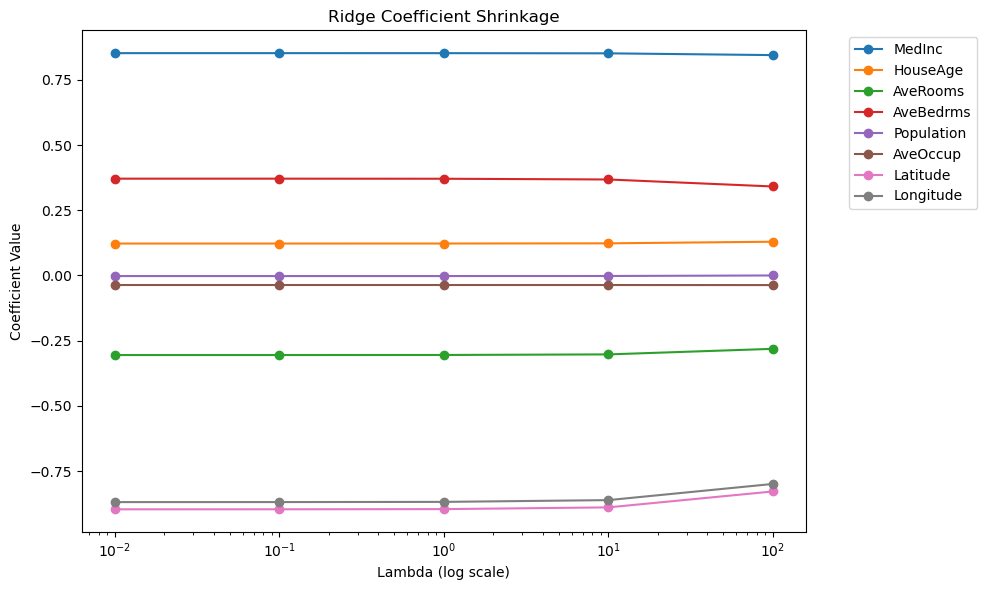

In [19]:
from sklearn.linear_model import Ridge
lambdas = [0.01, 0.1, 1, 10, 100]
ridge_coefficients = []
ridge_metrics = []

# --- Apply Ridge Regression ---
# Train ridge for each of the lambda values & evaluate with metrics 
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    
    ridge_coefficients.append(ridge.coef_)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    ridge_metrics.append({'Lambda': alpha, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

ridge_metrics_df = pd.DataFrame(ridge_metrics)
display(ridge_metrics_df)

# Plot coeff shrinkage 
plt.figure(figsize=(10, 6))
for i in range(features_scaled.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in ridge_coefficients], marker='o', label=features_scaled.columns[i])
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficient Shrinkage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


,Lambda,MSE,RMSE,R2
0,0.01,0.547933,0.740225,0.581861
1,0.10,0.679552,0.824349,0.481420
2,1.00,1.310696,1.144856,-0.000219
3,10.00,1.310696,1.144856,-0.000219
4,100.00,1.310696,1.144856,-0.000219


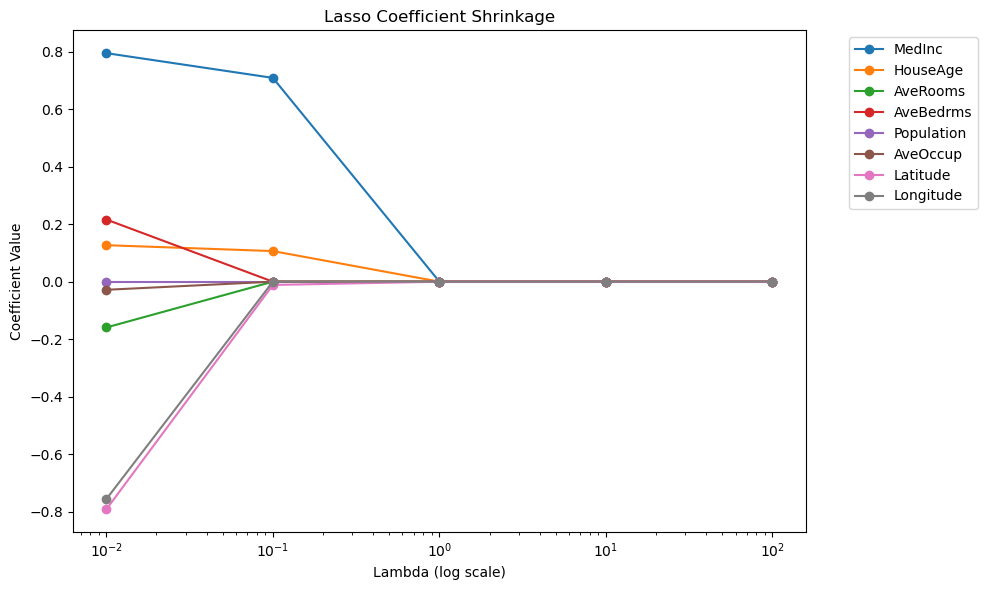

In [20]:
# --- Apply Lasso Regression --- 
from sklearn.linear_model import Lasso
lasso_coefficients = []
lasso_metrics = []

# Train Lasso for each lambda
for alpha in lambdas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    
    lasso_coefficients.append(lasso.coef_)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    lasso_metrics.append({'Lambda': alpha, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

lasso_metrics_df = pd.DataFrame(lasso_metrics)
display(lasso_metrics_df)

# Plot coeff shrinkage 
plt.figure(figsize=(10, 6))
for i in range(features_scaled.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in lasso_coefficients], marker='o', label=features_scaled.columns[i])
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Shrinkage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Ridge vs Lasso Performance**
For all lambda values > 0.01 that I used in this analysis, the Ridge Regression performed better than the Lasso Regression. We can see this in the values of MSE, RMSE, and R^2. The MSE and RMSE values for Ridge are smaller for lambda=0.1, 1, 10, and 100, indicating less error between predictions and actual values. The R^2 vlaue is smaller for these lambda values, indicating that the Rigde model has a better fit to the data than the Lasso model. 

Lasso feature selection: Lasso set coefficients of Population to always be 0. At lambda = 0.1, AveRooms, AveBedrms, AveOccup, and Longitude are set to 0. At the next lambda value, all features coeffcients are set to 0. These are the features that Lasso eliminated. 

---
### **4. Interpretation & Discussion (5 points)**
- **Compare and interpret results:**
    - How did Ridge and Lasso handle multicollinearity?
    - Which model had better predictive accuracy?
    - When would you use Ridge over Lasso (and vice versa)?
- **Discuss implications for real-world regression problems:**
    - If a model has too many irrelevant features, which method (Ridge or Lasso) would be more effective?
    - How does regularization impact overfitting in high-dimensional datasets?

Ridge and Lasso handle multicollinearity differently. Ridge works to reduce the magnitude of the feature coefficients but retains all of them. This spreads out the performance gains of the correlated features across them (which still makes interpretability a bit difficult). Lasso works to make the magnitude of certain features identically zero, effectively eliminating redundant features from the dataset. We saw this in the above analysis with Latitude and Longitude for example. Lasso correctly identified the multicollinearity between these features and removed Longitude from the feature set (by setting its coefficient to 0). 

Overall, Ridge had a better predictive accuracy because it had lower MSE, RMSE, and R^2 values compared to Lasso. I would use Ridge when I suspect there is multicollinearity present in the data, and all the features I have are relevant (I want to retain all the features in my feature set). Also, I would use Ridge when I care more about predictive accuracy rather than interpretability. I would use Lasso when I suspect there is multicollinearity present in the data, but I want to perform feature selection (exclude some features from the feature set). This would be the case if I thought that some of the features may not be relevant to the application, or if I had a really high dimensional dataset. Also, I would use Lasso when I care more about the interpetability of the model.  

If a model has too many irrelevant features, I would use the Lasso method. This is becuse Lasso will identify those features that are not needed and set their coefficients/weights to 0, effectively removing them from the feature dataset. 

Regularization impacts overfitting in high-dimensional datasetss by giving penalties to large/unnecessary feature coefficients. This helps to make the model more simple and can help it to genearlize better. Ridge regression shrinks the feature coefficients to reduce variance, and Lasso eliminates irrelevant features. Both methods reduce model complexity and improve stability, which helps the model to not memorize the training data and generalize to unseen data. The model is forced to generalize from less features, or weigh the features more conservatively. 

# Q2: Supervised Learning Classification  
## Breast Cancer Prediction Using Feature Engineering & SVM (40 points total)

In this question, you will build a classifier to predict the diagnosis of breast cancer (malignant vs. benign) using structured diagnostic data. You will preprocess features, engineer new ones, and evaluate multiple classification models, with a focus on implementing Support Vector Machines (SVMs) from scratch using quadratic programming.

---

## 1. Data Acquisition & Preprocessing (5 points)

- **Dataset**: Use the [Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) (also available via `sklearn.datasets.load_breast_cancer()`).

### Exploratory Data Analysis (EDA):
- Examine the distribution of the target variable (`diagnosis`: M = malignant, B = benign).
- Identify any missing or anomalous values.
- Explore relationships between features such as:
  - `mean radius`
  - `mean texture`
  - `mean smoothness`

### Feature Engineering:
- Encode the target variable (`diagnosis`) into binary:
  - `1 = malignant`, `0 = benign`
- Normalize continuous features using `StandardScaler` or `MinMaxScaler` (especially important for SVM).
- Create interaction terms or polynomial features (e.g., `mean radius × mean texture`, `mean concavity²`) using `PolynomialFeatures` from `sklearn.preprocessing`.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures

# Load the data 
breast_cancer_data = load_breast_cancer()

# Distribution of target 
# breast_cancer_data['data']
# breast_cancer_data['target']

breast_cancer_df = pd.DataFrame(breast_cancer_data['data'], columns=breast_cancer_data['feature_names'])
breast_cancer_df['target'] = breast_cancer_data['target']

print(f"Number of Benign cases: {(breast_cancer_df.target==0).sum()}")
print(f"Number of Malignant cases: {(breast_cancer_df.target==1).sum()}\n")
      
# --- Exploratory Data Analysis ---
# Descriptive statistics and feature distributions 
print("Descriptive Stats:")
display(breast_cancer_df.describe())

# Missing or anomalous values 
print("Missing Data:")
display(breast_cancer_df.isna().sum())

# Relationship between features 

# --- Feature Engineering --- 
# The target variable is already encoded as 0 and 1 for benign and malignant. 
# Normalize features 
features = breast_cancer_df.drop(columns='target')
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Create interaction terms 
interaction_feature_names = ['mean radius', 'mean texture', 'mean concavity']
interaction_features = features[interaction_feature_names]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
features_poly = poly.fit_transform(interaction_features)
poly_feature_names = poly.get_feature_names_out(interaction_feature_names)

poly_features_df = pd.DataFrame(features_poly, columns=poly_feature_names)
print('Interaction Features:')
display(poly_features_df)

features_total = pd.concat([features_scaled, poly_features_df])  # Include interaction terms into the total feature set 

Number of Benign cases: 212
Number of Malignant cases: 357

Descriptive Stats:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Missing Data:


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Interaction Features:


,mean radius,mean texture,mean concavity,mean radius^2,mean radius mean texture,mean radius mean concavity,mean texture^2,mean texture mean concavity,mean concavity^2
0,17.99,10.38,0.30010,323.6401,186.7362,5.398799,107.7444,3.115038,0.090060
1,20.57,17.77,0.08690,423.1249,365.5289,1.787533,315.7729,1.544213,0.007552
2,19.69,21.25,0.19740,387.6961,418.4125,3.886806,451.5625,4.194750,0.038967
3,11.42,20.38,0.24140,130.4164,232.7396,2.756788,415.3444,4.919732,0.058274
4,20.29,14.34,0.19800,411.6841,290.9586,4.017420,205.6356,2.839320,0.039204
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.24390,464.8336,482.7284,5.258484,501.3121,5.460921,0.059487
565,20.13,28.25,0.14400,405.2169,568.6725,2.898720,798.0625,4.068000,0.020736
566,16.60,28.08,0.09251,275.5600,466.1280,1.535666,788.4864,2.597681,0.008558
567,20.60,29.33,0.35140,424.3600,604.1980,7.238840,860.2489,10.306562,0.123482


---

## 2. Model Training & Evaluation (20 points)

Train the following classifiers:

- **Logistic Regression** (baseline; use `scikit-learn`)
- **Decision Tree Classifier** (interpretable; use `scikit-learn`)
- **Support Vector Machine (SVM)**:
  - Implement from scratch using the `cvxopt` quadratic programming solver
  - Do **not** use `scikit-learn`'s `SVC` or `LinearSVC`

### Evaluation Metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- ROC-AUC Curve

Use appropriate plots to visualize performance (e.g., confusion matrix heatmap, ROC curves).

---

## 3. Hyperparameter Tuning (10 points)

### Hyperparameter Tuning:
- **Logistic Regression**: Tune regularization parameter `C`
- **Decision Tree**: Tune `max_depth` and optionally `min_samples_leaf`
- **SVM**: Try both linear and RBF kernels (implement both kernels)
  - Linear Kernel - $K(x,x') = x^T x' $
  - RBF kernel - $K(x,x') = \exp(-\gamma || x - x' ||^2)$
    - where $\gamma > 0$ is a parameter that defines the spread of the kernel


---

## 4. Interpretation & Discussion (5 points)

### Model Comparison:
- Which model performed best overall?
- Which model showed the most stability (i.e., smallest performance variance across folds)?
- How did kernel choice in SVM influence classification performance?
- Did feature scaling or polynomial features help the SVM?

### Real-World Implications:
- What are the consequences of **false negatives** in this breast cancer prediction task?
- In a medical diagnosis context, would you prioritize **precision** or **recall**? Why?
- Is your SVM implementation viable for use in clinical decision-making tools? What improvements would be necessary?

---

## Submission Guidelines:
- Submit a Jupyter notebook (or `.py` script) with all code and plots
- Include a brief summary of findings at the end of the notebook
- Code should be clearly commented and structured

---

## Optional Extensions:
- Implement grid search manually for SVM kernel and `C` tuning
- Use SHAP or LIME for post hoc model explanation (especially for the logistic model)

# **Q3: Custom K-Means Clustering Framework**

## Build a custom K-Means clustering framework from scratch (scikit-learn not permitted) (30 points total)

In this question, you will implement the K-Means clustering algorithm from scratch and develop a framework that evaluates multiple candidate numbers of clusters. You will apply your framework to the **Wholesale Customers Dataset** from the UCI Machine Learning Repository, which is well-suited for clustering-based customer segmentation. **Note:** For the clustering analysis, you should drop the **Channel** and **Region** columns, focusing solely on the spending features. Additionally, you will analyze the runtime of your algorithm and provide an asymptotic complexity analysis.

---

### **1. Data Acquisition & Preprocessing (5 points)**
- **Dataset:** Download the **Wholesale Customers Dataset** from the UCI Machine Learning Repository.
- **Exploratory Data Analysis (EDA):**
  - Identify missing or inconsistent values.
  - Analyze the distributions of features.
  - Apply normalization or standardization if necessary to ensure the data is suitable for clustering.
  - **Important:** Remove the **Channel** and **Region** columns before performing clustering analysis.

---

### **2. Problem Formulation & Algorithm Design (10 points)**
- **Objective:** Clearly define the goal of clustering in the context of customer segmentation using the Wholesale Customers dataset.
- **Algorithm Overview:**
  - Provide a brief explanation of the K-Means clustering algorithm, detailing its main steps:
    - **Initialization:** Selecting initial centroids.
    - **Assignment:** Allocating data points to the nearest centroid.
    - **Update:** Recalculating centroids based on the current cluster members.
- **Framework Requirements:**
  - Develop a framework that accepts a list of candidate numbers of clusters (e.g., [2, 3, 4, 5, 6]).
  - For each candidate value, run your custom K-Means algorithm.
  - Compute clustering metrics (such as Within-Cluster Sum of Squares (WCSS) and silhouette score—metrics introduced in lecture) for each clustering result.
  - Select and justify the best number of clusters based on your computed metrics.
- **Considerations:**
  - Discuss any assumptions you make (e.g., initialization methods, convergence criteria).
  - Identify potential challenges in applying K-Means to this dataset.

---

### **3. Implementation & Runtime Analysis (10 points)**
- **Implementation:**
  - Write your own implementation of the K-Means algorithm in Python without using any built-in clustering libraries.
  - Integrate the algorithm into a framework that automates the process for multiple candidate numbers of clusters.
- **Runtime Analysis:**
  - Measure and report the total runtime of your algorithm for different candidate values.
  - Analyze the computational complexity of your implementation. Provide the asymptotic notation (e.g., O(n × k × i)), where:
    - *n* is the number of data points,
    - *k* is the number of clusters,
    - *i* is the number of iterations until convergence.
- **Documentation:**
  - Ensure your code is well-documented, with comments explaining the functionality of key components.

---

### **4. Evaluation & Reflection (5 points)**
- **Result Comparison:**
  - Compare the clustering results obtained for each candidate number of clusters using your chosen metrics.
  - Identify which number of clusters produced the best overall performance.
- **Discussion:**
  - Analyze how the resultant clusters relate back to the physical world. For example, interpret the clusters in terms of customer segmentation by exploring patterns such as purchasing behavior, spending habits, or other relevant characteristics.
  - Discuss what the cluster profiles might imply for real-world applications, such as targeted marketing strategies or business decision-making.
  - Reflect on the trade-offs between clustering quality and runtime performance.

---

This question is designed to deepen your understanding of unsupervised learning, algorithm development, and performance evaluation. Be sure to clearly justify your design choices and critically analyze your results throughout the report.
